#### ポアソン分布とは？

ポアソン分布は、ある間隔（時間や長さなど）の間に起こるイベントの回数に注目するものです。
まずは、その定義をみたあとに、その式の意味するところを噛み砕いていくことにしましょう。

離散確率変数Xが、パラメータλを持つポアソン分布に従うとき、k=0,1,2.., に対応する確率を生成する確率質量関数は、次の式で与えられます。
$$Pr(X=k)=\frac{\lambda^ke^{-\lambda}}{k!}$$

eは自然対数の底（ネイピア数）で、e=2.718...となる数です。k!はkの階乗。      

ポアソン分布には、次のような性質があります。

    1.) 離散的です。(x=0,1,2,3...)
    2.) この数は、0から無限大までの値を取り得ます。
    3.) あまり頻繁には起こらない事象の確率分布を表現します。
    4.) それぞれの事象は独立です。
    5.) 時間や距離などの間隔で起きる事象について記述します。
    6.) 事象が起きる回数の期待値は定数です。

例を見てみましょう。

マクドナルドのランチのピークは、12:30から1:00の間です。これまでの経験から、平均で10人のお客さんが、この時間帯に来店することが分かっています。それでは、ちょうど7人のお客さんが来店する確率はどれくらいでしょうか？また、10人より多いお客さんが来る確率はどれくらいでしょうか？

これまでの経験から、お昼のピーク30分間に、10人のお客さんが来ることがわかっています。この10は平均値、つまり期待値です。これはポアソン分布のパラメータλに相当します。

ポアソン分布はλが決まれば、決まりますので、この例題に答えることができます。やってみましょう。


In [1]:
# lambdaはPythonの予約後なので、そのまま変数には使えない

# lambとしてλをセット
lamb=10
# ちょうどk人来る確率を掲載んしたいので、k=7
k=7

In [28]:
# 標準mathモジュールから、必要なものをインポート
# 自然対数e
from math import exp
# 階乗
from math import factorial

In [3]:
# 確率質量関数を使って確率を計算
prob = (lamb**k)*exp(-lamb)/factorial(k)

In [4]:
print('昼のピーク時にお客さんが7人である確率は、{:0.2f}%です'.format(100*prob))

昼のピーク時にお客さんが7人である確率は、9.01%です


確率質量関数を手作りできました。scipyを使うともう少し楽です。

In [5]:
# scipy.statsから、poissonをインポートします
from scipy.stats import poisson

In [6]:
# 平均は10
mu = 10

In [7]:
# 平均と分散を計算
mean,var = poisson.stats(mu)

In [8]:
# 確率質量関数を使って、特定の確率を計算することも可能
odds_seven = poisson.pmf(7,mu)

In [9]:
print('ピーク時に7人の確率は{:0.2f}％'.format(odds_seven*100))

print('平均={}'.format(mean))

ピーク時に7人の確率は9.01％
平均=10.0


分布の全体を見ておくことにします。これは、10人よりお客が多い確率を求めるのに必要です。

In [12]:
# 確率質量関数をプロット
import numpy as np

In [13]:
# ひとまず、30人のお客さんが来る確率です。理論的には無限大まであり得ます。
k = np.arange(30)

In [14]:
# 平均は10です。
lamb = 10

In [15]:
# これで確率を計算できます。
pmf_pois = poisson.pmf(k,lamb)
pmf_pois

array([  4.53999298e-05,   4.53999298e-04,   2.26999649e-03,
         7.56665496e-03,   1.89166374e-02,   3.78332748e-02,
         6.30554580e-02,   9.00792257e-02,   1.12599032e-01,
         1.25110036e-01,   1.25110036e-01,   1.13736396e-01,
         9.47803301e-02,   7.29079462e-02,   5.20771044e-02,
         3.47180696e-02,   2.16987935e-02,   1.27639962e-02,
         7.09110899e-03,   3.73216263e-03,   1.86608131e-03,
         8.88610150e-04,   4.03913704e-04,   1.75614654e-04,
         7.31727725e-05,   2.92691090e-05,   1.12573496e-05,
         4.16938875e-06,   1.48906741e-06,   5.13471521e-07])

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
plt.style.use('seaborn-whitegrid')

<Container object of 30 artists>

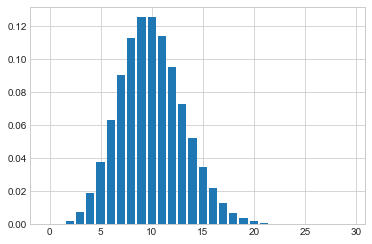

In [18]:
plt.bar(k,pmf_pois)

10人より多くのお客さんがくる確率はどれくらいでしょうか？

これは、11人以降の確率の値をすべて足し合わせれば良いわけですが、これを実現するのが、累積分布関数（CDF: Cumulative Distribution Function）です。

累積分布関数は、指定された値までの確率を足し合わせた値を返してくれます。

In [20]:
# お客さんが10人車での確率を計算するので、k=10
# 平均値も同じく10
k,mu = 10,10

In [21]:
# お客さんが10人までの確率絵を次のコードで計算
prob_up_to_ten = poisson.cdf(k,mu)

In [22]:
print('お客さんが10人までの確率は、{:0.2f}%です'.format(100*prob_up_to_ten))

お客さんが10人までの確率は、58.30%です


10人より多く来る確率は、1からこの値を引くだけです。

In [25]:
prob_more_than_ten = 1 - prob_up_to_ten

In [26]:
print('10人より多くのお客さんが来る確率は、{:0.2f}%です。'.format(100*prob_more_than_ten))

10人より多くのお客さんが来る確率は、41.70%です。


-----

ポアソン分布の基本的なことを解説しました。
以下の資料も参考にしてみてください。

1.)https://ja.wikipedia.org/wiki/%E3%83%9D%E3%82%A2%E3%82%BD%E3%83%B3%E5%88%86%E5%B8%83

2.)http://stattrek.com/probability-distributions/poisson.aspx

3.)http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html